# Exploratory data analysis and initial model testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.stats import randint as sp_randint
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from lmfit import Model
from xgboost import XGBRegressor
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics.pairwise import cosine_similarity
#import autosklearn.regression

pl.style.use('seaborn')
pl.rc('font',family='Arial')

## Read in data

In [2]:
raw_data = pd.read_csv("SubCh1_TrainingData.csv")
test_data = pd.read_csv("SubCh1_TestData.csv")
train_data = raw_data

In [3]:
train_data.head(10)

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,24HR,DHA,BRep1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,24HR,DHA,BRep2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,24HR,UT,BRep1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,24HR,UT,BRep2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,6HR,DHA,BRep1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177
5,isolate_01.6HR.DHA.BRep2,isolate_01,6HR,DHA,BRep2,-0.218074,-1.068870,-1.440467,-0.818662,-1.012132,...,-1.193494,0.062885,-0.309228,-1.563902,-3.632878,-2.245867,-1.462684,-4.701007,-1.618385,2.177
6,isolate_01.6HR.UT.BRep1,isolate_01,6HR,UT,BRep1,1.311350,-1.613464,-1.298663,-1.441343,-1.735923,...,-0.664116,-6.617301,2.161030,0.411185,-4.491597,-1.825722,-1.490832,-5.514126,-2.622619,2.177
7,isolate_01.6HR.UT.BRep2,isolate_01,6HR,UT,BRep2,0.997722,-1.553994,-1.960600,-1.424590,0.023609,...,-0.136047,-4.869960,-1.340846,-2.424770,-4.075909,-0.819760,-2.626978,-4.087643,-2.247185,2.177
8,isolate_02.24HR.DHA.BRep1,isolate_02,24HR,DHA,BRep1,-0.178971,-1.922426,-1.875015,-1.484605,-0.233600,...,0.024133,-2.215227,-1.957654,-2.188635,-4.424748,-2.986927,-1.722201,-3.995680,-0.902979,1.697
9,isolate_02.24HR.DHA.BRep2,isolate_02,24HR,DHA,BRep2,1.337421,-1.764941,-0.414673,-0.686910,0.291468,...,0.806314,-3.733712,-1.990368,-1.633418,-5.533077,-3.283316,-2.104227,-5.767710,-2.177930,1.697


In [4]:
train_data['Timepoint'] = [1 if i == '24HR' else 0 for i in train_data['Timepoint']]
train_data['Treatment'] = [1 if i == 'DHA' else 0 for i in train_data['Treatment']]
train_data['BioRep'] = [int(i[-1]) for i in train_data['BioRep']]

In [5]:
train_data.head()

,Sample_Name,Isolate,Timepoint,Treatment,BioRep,MAL1.465720.465873.bc..rv..,MAL1.48287.48430....kr...can,MAL1.562126.562246.bc..r...,MAL1.59416.59687....kr...can,MAL1.616633.616682.......y.,...,PF3D7_1479200,PF3D7_1479400,PF3D7_1479500,PF3D7_1479600,PF3D7_1479700,PF3D7_1479800,PF3D7_1479900,PF3D7_1480000,PF3D7_1480100,DHA_IC50
0,isolate_01.24HR.DHA.BRep1,isolate_01,1,1,1,0.008286,-0.959492,0.206468,-0.443936,0.453030,...,-0.540993,-3.674097,-1.652979,-2.255490,-4.554757,-0.381422,-1.415857,-4.121011,-2.486528,2.177
1,isolate_01.24HR.DHA.BRep2,isolate_01,1,1,2,-0.872028,-1.968558,-2.308563,-1.186611,0.508575,...,0.450649,-4.464408,-0.977954,-2.012559,-4.538550,-2.333890,-2.342496,-4.774197,-1.794568,2.177
2,isolate_01.24HR.UT.BRep1,isolate_01,1,0,1,0.039480,-1.291371,-0.946661,-0.538092,-1.778501,...,1.411557,-5.500522,-1.764229,-1.947208,-5.331037,-0.814417,-2.141285,-3.922684,-2.495169,2.177
3,isolate_01.24HR.UT.BRep2,isolate_01,1,0,2,0.125177,-1.462758,-1.888105,-0.828352,-1.410803,...,-0.659519,-5.011207,-0.559471,-2.266763,-5.289318,-2.949869,-2.206432,-4.324299,-1.735312,2.177
4,isolate_01.6HR.DHA.BRep1,isolate_01,0,1,1,1.354956,-2.139128,-0.541696,-1.481881,-0.735798,...,-1.687048,-4.773306,-0.048847,-2.023727,-4.398358,-3.080500,-0.566545,-4.798190,-0.821690,2.177


In [6]:
genes = list(train_data.drop(['DHA_IC50','Sample_Name','Isolate','Timepoint','Treatment','BioRep'], axis=1).columns)
genes[0]

'MAL1.465720.465873.bc..rv..'

In [24]:
sub1 = train_data[(train_data['Treatment'] == 1)&(train_data['Timepoint'] == 1)&(train_data['BioRep'] == 1)]
sub2 = train_data[(train_data['Treatment'] == 1)&(train_data['Timepoint'] == 1)&(train_data['BioRep'] == 2)]

sub1 = sub1.drop(['DHA_IC50','Sample_Name','Isolate','Timepoint','Treatment','BioRep'],axis=1)
sub1 = sub1.apply(lambda x: x.std(), axis=0)
sub1.sort_values(ascending=False).head(30)

PF3D7_1254500                 3.259061
PF3D7_0632300                 3.223630
PF3D7_1300400                 2.570437
PF3D7_0930300                 2.407255
PF3D7_1200300                 2.311024
PF3D7_1040600                 2.310707
PF3D7_0400500                 2.044754
PF3D7_1400400                 2.021674
PF3D7_0900300                 2.010657
PF3D7_1040500                 1.928240
PF3D7_0401400                 1.924573
PF3D7_1040900                 1.908138
PF3D7_1040100                 1.783659
PF3D7_1254200                 1.755464
PF3D7_0600900                 1.743729
PF3D7_0632400                 1.731571
PF3D7_1335300                 1.730629
PF3D7_0100900                 1.700307
PF3D7_0425200                 1.682786
PF3D7_0606400                 1.669513
PF3D7_1041100                 1.656631
PF3D7_0414900                 1.647506
PF3D7_0730700                 1.639114
MAL9.1364119.1364181.....r    1.633403
PF3D7_1300700                 1.615216
PF3D7_0206800            

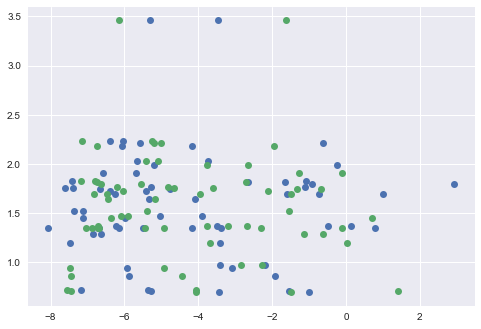

In [8]:
sub1 = train_data[(train_data['Treatment'] == 0)&(train_data['Timepoint'] == 0)]
sub2 = train_data[(train_data['Treatment'] == 1)&(train_data['Timepoint'] == 0)]

pl.plot(sub1['PF3D7_1040600'],sub1['DHA_IC50'],marker='o',linestyle='none')
pl.plot(sub2['PF3D7_1040600'],sub2['DHA_IC50'],marker='o',linestyle='none')
pl.show()

### Drop out features with high variance between bioreps

In [25]:
reps1_11 = train_data[(train_data['Treatment'] == 1)&(train_data['Timepoint'] == 1)&(train_data['BioRep'] == 1)]
reps2_11 = train_data[(train_data['Treatment'] == 1)&(train_data['Timepoint'] == 1)&(train_data['BioRep'] == 2)]

names = []

for i in range(len(genes)):
    if np.mean(abs(reps2_11.values[:,i+6] - reps1_11.values[:,i+6])) > 0.3:
        names.append(genes[i])
    
train_data_trim = train_data.drop(names,axis=1)
train_data_trim.describe()

,Timepoint,Treatment,BioRep,PF3D7_0102700,PF3D7_0103300,PF3D7_0104300,PF3D7_0110900,PF3D7_0203900,PF3D7_0205900,PF3D7_0208300,...,PF3D7_1443000,PF3D7_1447700,PF3D7_1452900,PF3D7_1459400,PF3D7_1466800,PF3D7_1472400,PF3D7_1474400,PF3D7_1475500,PF3D7_1480100,DHA_IC50
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,...,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.500000,0.500000,1.911765,-0.656518,0.003341,0.488966,0.911122,0.186162,-0.408952,0.477734,...,0.048526,0.126642,-0.542918,0.491481,0.467162,1.090970,-0.194671,-0.079263,-1.746997,1.570315
std,0.500922,0.500922,1.360869,0.768074,0.383878,0.414207,0.706979,0.450413,0.515017,0.384497,...,0.391449,0.447384,0.523201,0.543249,0.557915,0.345910,0.260255,0.546303,0.800431,0.534407
min,0.000000,0.000000,1.000000,-2.389756,-1.058705,-0.535420,-0.658608,-0.876615,-2.042680,-0.829850,...,-1.042947,-0.988316,-2.049345,-1.421211,-1.487195,-0.009897,-0.842343,-1.505961,-3.707360,0.693300
25%,0.000000,0.000000,1.000000,-1.200685,-0.282738,0.168206,0.399479,-0.177298,-0.733092,0.211983,...,-0.218453,-0.201537,-0.895547,0.150176,0.131071,0.876674,-0.377418,-0.414997,-2.294710,1.348000
50%,0.500000,0.500000,2.000000,-0.674978,0.000098,0.451528,0.907995,0.220048,-0.388052,0.468086,...,0.057867,0.090315,-0.571330,0.513751,0.484825,1.094152,-0.221504,-0.130986,-1.822472,1.582000
75%,1.000000,1.000000,2.000000,-0.148707,0.283522,0.805827,1.426424,0.510696,0.016293,0.725413,...,0.307646,0.407008,-0.234967,0.885440,0.849716,1.311318,-0.046867,0.264446,-1.333393,1.820000
max,1.000000,1.000000,8.000000,1.366969,0.991515,1.437502,2.592767,1.435025,0.701489,1.680617,...,1.196030,1.457894,0.903457,1.830363,1.782409,2.077117,0.813209,1.468377,1.015633,3.460000


## Split into train and test data

In [10]:
X = train_data.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

### Linear Regression

#### 6H, untreated

In [162]:
X = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 0)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 0)][['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

1.0
-3.8739718084
0.726636501665


In [163]:
coefs_6HUT = []
preds_6HUT = []

for g in genes:
    linear_model.fit(X[g].values.reshape(-1, 1), Y)
    preds_6HUT.append(linear_model.predict(X[g].values.reshape(-1, 1)))
    coefs_6HUT.append(linear_model.coef_[0][0])
    
c6HUT = pd.DataFrame(list(zip(genes,coefs_6HUT,preds_6HUT)),columns =['gene', 'coef','pred'])

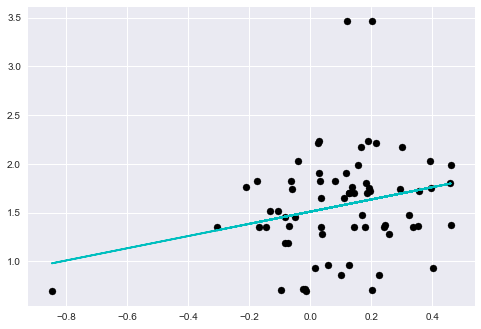

In [165]:
n = 5485
pl.plot(X[genes[n]],c6HUT['pred'][n],c='c')
pl.scatter(X[genes[n]],Y,c='k')
pl.show()

#### 6H, treated

In [110]:
X = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 0)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 0)][['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
coefs_6HT = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_model.coef_))], axis = 1)
coefs_6HT.columns = ["feature", "coef"]
coefs_6HT = coefs_6HT.sort_values(by='coef')

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

1.0
-0.700700365557
0.253549058671


In [120]:
coefs_6HT = []
preds_6HT = []

for g in genes:
    linear_model.fit(X[g].reshape(-1, 1), Y)
    preds_6HT.append(linear_model.predict(X[g].reshape(-1, 1)))
    coefs_6HT.append(linear_model.coef_[0][0])
    
c6HT = pd.DataFrame(list(zip(genes,coefs_6HT,preds_6HT)),columns =['gene', 'coef','pred']) 

/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


#### 24H, untreated

In [121]:
X = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==0)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
coefs_24HUT = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_model.coef_))], axis = 1)
coefs_24HUT.columns = ["feature", "coef"]
coefs_24HUT = coefs_24HUT.sort_values(by='coef')

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

1.0
-1.98577318508
0.445134249286


In [122]:
coefs_24HUT = []
preds_24HUT = []

for g in genes:
    linear_model.fit(X[g].reshape(-1, 1), Y)
    preds_24HUT.append(linear_model.predict(X[g].reshape(-1, 1)))
    coefs_24HUT.append(linear_model.coef_[0][0])
    
c24HUT = pd.DataFrame(list(zip(genes,coefs_24HUT,preds_24HUT)),columns =['gene', 'coef','pred']) 

/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


#### 24H, treated

In [19]:
X = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
coefs_24HT = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_model.coef_))], axis = 1)
coefs_24HT.columns = ["feature", "coef"]
coefs_24HT = coefs_24HT.sort_values(by='coef')

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

1.0
-1.5193042938283297
0.375590694952945


In [20]:
coefs_24HT = []
preds_24HT = []

for g in genes:
    linear_model.fit(X[g].reshape(-1, 1), Y)
    preds_24HT.append(linear_model.predict(X[g].reshape(-1, 1)))
    coefs_24HT.append(linear_model.coef_[0][0])
    
c24HT = pd.DataFrame(list(zip(genes,coefs_24HT,preds_24HT)),columns =['gene', 'coef','pred']) 

/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


#### all

In [125]:
X = train_data.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state=5)

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
Y_pred = linear_model.predict(X_test)

print(linear_model.score(X_train,Y_train))
print(linear_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))
coefs_all = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(linear_model.coef_))], axis = 1)
coefs_all.columns = ["feature", "coef"]
coefs_all = coefs_all.sort_values(by='coef')

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

1.0
-1.9141253823
0.686344865733


In [126]:
coefs_all = []
preds_all = []

for g in genes:
    linear_model.fit(X[g].reshape(-1, 1), Y)
    preds_all.append(linear_model.predict(X[g].reshape(-1, 1)))
    coefs_all.append(linear_model.coef_[0][0])
    
c_all = pd.DataFrame(list(zip(genes,coefs_all,preds_all)),columns =['gene', 'coef','pred']) 

/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/shasha/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


### SVR

In [22]:
#X = train_data_trim[(train_data_trim['Treatment']==1)&(train_data_trim['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
#Y = train_data_trim[(train_data_trim['Treatment']==1)&(train_data_trim['Timepoint'] == 1)][['DHA_IC50']]
#X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

svr_model = SVR()
svr_model.fit(X_train, Y_train.values.ravel())
Y_pred = svr_model.predict(X_test)

print(svr_model.score(X_train,Y_train))
print(svr_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

0.381301103276
-0.0282481713151
0.361947799118


### KNN

1.0
0.0441631982718
0.305827974485


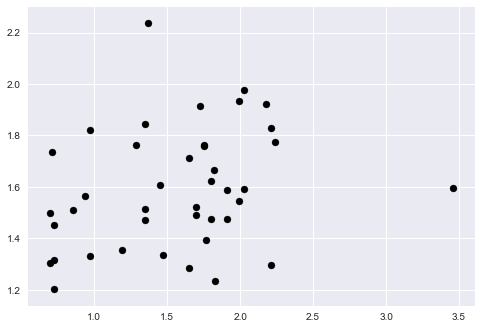

In [125]:
X = train_data.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15)

knn_model = neighbors.KNeighborsRegressor(5,weights='distance')
knn_model.fit(X_train, Y_train.values.ravel())
Y_pred = knn_model.predict(X_test)

print(knn_model.score(X_train,Y_train))
print(knn_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
pl.scatter(Y_test, Y_pred, color='k')
pl.show()

### Decision Tree

In [25]:
X = train_data_trim.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data_trim[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=5)

tree_model = DecisionTreeRegressor(max_depth=50)
tree_model.fit(X_train, Y_train)
Y_pred = tree_model.predict(X_test)

print(tree_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

-0.874742387548
0.659917420732


### Random Forest

In [12]:
#X = train_data_trim[(train_data_trim['Treatment']==1)&(train_data_trim['Timepoint'] == 0)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
#Y = train_data_trim[(train_data_trim['Treatment']==1)&(train_data_trim['Timepoint'] == 0)][['DHA_IC50']]
X = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=25)

np.random.seed(999)
forest_model = RandomForestRegressor(max_features=10,n_estimators=100, bootstrap=False,random_state = 999)
forest_model.fit(X_train, Y_train.values.ravel())
Y_pred = forest_model.predict(X_test)

print(forest_model.score(X_test,Y_test))
#print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[2]], Y_test,  color='black')
#pl.scatter(X_test[genes[2]], Y_pred, color='c')
#pl.show()

#pl.scatter(Y_test, Y_pred, color='k')
#pl.show()

importances = list(forest_model.feature_importances_[:20])
feature_list = list(train_data.columns[:20])
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('{:20} Importance: {}'.format(*pair)) for pair in feature_importances];

-0.019736212249393814
Sample_Name          Importance: 0.0
Isolate              Importance: 0.0
Timepoint            Importance: 0.0
Treatment            Importance: 0.0
BioRep               Importance: 0.0
MAL1.465720.465873.bc..rv.. Importance: 0.0
MAL1.48287.48430....kr...can Importance: 0.0
MAL1.562126.562246.bc..r... Importance: 0.0
MAL1.59416.59687....kr...can Importance: 0.0
MAL1.616633.616682.......y. Importance: 0.0
MAL10.1139073.1139243....kr Importance: 0.0
MAL10.258733.258825.b...r.. Importance: 0.0
MAL10.271753.271892.bcgkrvy Importance: 0.0
MAL10.273174.273239.....r.. Importance: 0.0
MAL10.416036.416142...g.... Importance: 0.0
MAL10.947605.947888.b..kr.. Importance: 0.0
MAL11.1116008.1116068.....r Importance: 0.0
MAL11.1839112.1839193....k. Importance: 0.0
MAL11.228710.228826.b.gk... Importance: 0.0
MAL11.390127.390200..cg...y Importance: 0.0


### Randomized Search

In [13]:
forest_model = RandomForestRegressor(bootstrap=False)

param_dist = {"n_estimators": sp_randint(10,50),
              "max_features": sp_randint(5, 20)}


n_iter_search = 20
random_search = RandomizedSearchCV(forest_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10, iid=False)

random_search.fit(X, Y.values.ravel())
random_search.best_params_

{'max_features': 19, 'n_estimators': 47}

### Grid Search

In [216]:
forest_model = RandomForestRegressor(bootstrap=False)

param_grid = {"n_estimators": [50,25,150],
              "max_features": [5, 3, 10],
              "min_samples_split": [2, 3, 10]}

grid_search = GridSearchCV(forest_model, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train, Y_train.values.ravel())

grid_search.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 50}

### XGBoost

In [14]:
xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train, Y_train.values.ravel())
Y_pred = xgb_model.predict(X_test)

print(xgb_model.score(X_train,Y_train))
print(xgb_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

0.9695851062861172
-0.32007138930264145
0.31247270180057723


### AdaBoost

In [37]:
X = train_data_trim.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data_trim[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

ada_model = AdaBoostRegressor(random_state=0, n_estimators=200)
ada_model.fit(X_train, Y_train.values.ravel())
Y_pred = ada_model.predict(X_test)

print(ada_model.score(X_train,Y_train))
print(ada_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

#pl.scatter(X_test[genes[0]], Y_test,  color='black')
#pl.scatter(X_test[genes[0]], Y_pred, color='c')
#pl.show()

0.712365324073
-0.196776082545
0.377834654008


### Gradient Boost

In [128]:
X = train_data.drop(['DHA_IC50','Sample_Name','Isolate','BioRep'], axis=1)
Y = train_data[['DHA_IC50']]
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

gb_model = GradientBoostingRegressor(loss='quantile', n_estimators=50)
gb_model.fit(X_train, Y_train.values.ravel())
Y_pred = gb_model.predict(X_test)

print(gb_model.score(X_train,Y_train))
print(gb_model.score(X_test,Y_test))
print(mean_squared_error(Y_test, Y_pred))

-0.258270136383
-0.258681301101
0.397378775231


## models to test

- Linear Regression
- Logistic Regression (won't work for non-binary values)
- Random forest
- Decision tree
- XGboost
- Ada boost
- SVR
- Naive Bayes
- Neural Network (feedforward)

https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd

Test using Spearman coefficient instead of Pearson

https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

## feature engineering

- start with 4 subsets (split then combine later), compare similarity to regression coefficients against IC50
- try PCA
- test with random forest
- try sklearn.feature_selection (https://www.kaggle.com/residentmario/automated-feature-selection-with-sklearn)
- add in cv score and spearmanr
- https://scikit-learn.org/stable/modules/feature_selection.html

## auto ML
- https://automl.github.io/auto-sklearn/master/examples/example_regression.html
- https://automl.github.io/auto-sklearn/master/installation.html
- https://medium.com/@santiagof/auto-is-the-new-black-google-automl-microsoft-automated-ml-autokeras-and-auto-sklearn-80d1d3c3005c
- https://automl.github.io/auto-sklearn/master/manual.html
- https://automl.github.io/auto-sklearn/master/_modules/autosklearn/estimators.html

In [21]:
c24HT.sort_values(by='coef').head(10)

,gene,coef,pred
5024,PF3D7_1428400,-0.606279,"[[1.6184641539026494], [1.1622273139490946], [..."
4814,PF3D7_1406700,-0.593220,"[[1.4985716908952094], [1.5765804858322292], [..."
4226,PF3D7_1319700,-0.573538,"[[1.342373149503099], [1.379832679035636], [1...."
3462,PF3D7_1147100,-0.531778,"[[1.3992152820046495], [1.5274994575341523], [..."
2490,PF3D7_0926300,-0.510235,"[[1.8980301087337885], [1.4498415448098878], [..."
1504,PF3D7_0623300,-0.509367,"[[1.5889417069770864], [1.6750975392972691], [..."
5484,PF3D7_1474400,-0.507578,"[[1.1269929094093571], [1.5576374479356954], [..."
3646,PF3D7_1215600,-0.503799,"[[1.3266998009759787], [1.5059283267299923], [..."
3563,PF3D7_1207200,-0.503291,"[[1.1979209592483118], [1.2825261211423293], [..."
1106,PF3D7_0515500,-0.496775,"[[1.2442067389046325], [1.3222031360220845], [..."


In [192]:
X_orig = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)].drop(['DHA_IC50','Sample_Name','Isolate'], axis=1)
Y = train_data[(train_data['Treatment']==1)&(train_data['Timepoint'] == 1)][['DHA_IC50']]

reps1 = X_orig[(X_orig['BioRep'] == 1)]
reps2 = X_orig[(X_orig['BioRep'] == 2)]

names = []

drop_point = 0.275

for i in range(len(genes)):
    if cosine_similarity(reps2.values[:,i+3].reshape(1, -1),reps1.values[:,i+3].reshape(1, -1))[0][0] < 0.5:
        names.append(genes[i])
    
X_new = X_orig.drop(names,axis=1)
print(len(X_new.columns))

1800
